In [426]:
import pandas as pd
import numpy as np

In [427]:
df = pd.read_csv('./BankChurners.csv')
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Ct
0,818906208,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,2,2,29081.0,1396,1538,36
1,713901108,Existing Customer,37,M,2,High School,Single,$60K - $80K,Blue,29,6,4,14575.0,0,3444,80
2,709513458,Existing Customer,49,M,3,High School,Unknown,$60K - $80K,Blue,36,3,2,9551.0,1833,3213,52
3,711421233,Existing Customer,51,M,3,High School,Single,$60K - $80K,Blue,43,5,3,7119.0,1513,4969,84
4,714037308,Existing Customer,54,M,2,High School,Married,$60K - $80K,Blue,50,3,3,2210.0,1002,4798,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1014,797410983,Existing Customer,45,F,3,High School,Married,Unknown,Blue,39,1,2,1438.3,745,5020,83
1015,771630783,Existing Customer,42,F,3,High School,Married,Unknown,Blue,30,1,2,1821.0,935,4786,87
1016,770762133,Existing Customer,52,F,3,High School,Married,Unknown,Blue,38,2,2,3505.0,2517,5034,79
1017,712884408,Existing Customer,43,F,1,High School,Single,Unknown,Blue,30,3,0,5700.0,1904,7939,95


In [428]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Ct
count,1.019000e+03,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000
mean,7.401269e+08,46.707556,2.426889,36.091266,3.883219,2.460255,9502.294112,1114.306183,4328.217861,64.310108
std,3.708247e+07,7.703293,1.301844,7.850176,1.561793,1.131414,9799.711614,817.133579,3427.146404,24.024914
min,7.080981e+08,26.000000,0.000000,13.000000,1.000000,0.000000,1438.300000,0.000000,647.000000,12.000000
25%,7.132372e+08,41.000000,1.000000,32.000000,3.000000,2.000000,2655.000000,0.000000,2075.000000,43.000000
50%,7.182800e+08,47.000000,2.000000,36.000000,4.000000,2.000000,5042.000000,1207.000000,3758.000000,67.000000
75%,7.733109e+08,52.000000,3.000000,41.000000,5.000000,3.000000,12202.000000,1726.500000,4680.000000,80.000000
max,8.282883e+08,67.000000,5.000000,56.000000,6.000000,6.000000,34516.000000,2517.000000,17634.000000,131.000000


# Total_Revolving_Bal 與 Credit_Limit 關係

In [429]:
X = np.array(df['Total_Revolving_Bal']).reshape(-1, 1)
X

array([[1396],
       [   0],
       [1833],
       ...,
       [2517],
       [1904],
       [1294]], dtype=int64)

In [430]:
y = df['Credit_Limit']
y

0       29081.0
1       14575.0
2        9551.0
3        7119.0
4        2210.0
         ...   
1014     1438.3
1015     1821.0
1016     3505.0
1017     5700.0
1018     7469.0
Name: Credit_Limit, Length: 1019, dtype: float64

In [431]:
from sklearn.linear_model import LinearRegression

# 建立線性回歸模型
model = LinearRegression()

# 擬合資料
model.fit(X, y)

LinearRegression()

In [432]:
coefficient = model.coef_
intercept = model.intercept_
print("迴歸係數:", coefficient)
print("截距:", intercept)

迴歸係數: [0.64989557]
截距: 8778.111458717045


In [433]:
from sklearn.metrics import mean_squared_error, r2_score

# 預測測試集資料
y_pred = model.predict(X)

# 計算MSE
mse = mean_squared_error(y, y_pred)
print("MSE:", mse)

# 計算R-squared
r2 = r2_score(y, y_pred)
print("R-squared:", r2)

MSE: 95658365.07558668
R-squared: 0.0029366127423938737


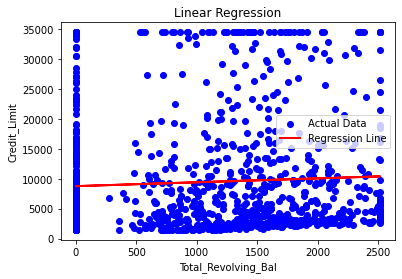

In [434]:
import matplotlib.pyplot as plt

# 繪製散點圖
plt.scatter(X, y, color='blue', label='Actual Data')

# 繪製回歸線
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Regression Line')

# 加入標籤和標題
plt.xlabel('Total_Revolving_Bal')
plt.ylabel('Credit_Limit')
plt.title('Linear Regression')
plt.legend()

# 顯示圖形
plt.show()

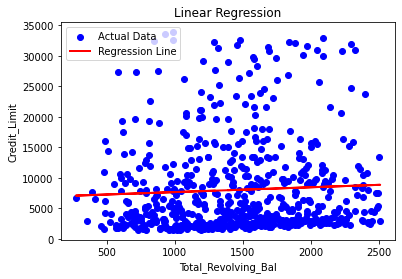

均方誤差: 56662365.352500126
R-squared: 0.0027277525648246037


In [435]:
# 去除 Total_Revolving_Bal 的極端值
q_low_x = df['Total_Revolving_Bal'].quantile(0.01)  # 取下分位數
q_high_x = df['Total_Revolving_Bal'].quantile(0.99)  # 取上分位數
df_modify = df[(df['Total_Revolving_Bal'] > q_low_x) & (df['Total_Revolving_Bal'] < q_high_x)]

# 去除 Credit_Limit 的極端值
q_low_y = df_modify['Credit_Limit'].quantile(0.01)  # 取下分位數
q_high_y = df_modify['Credit_Limit'].quantile(0.99)  # 取上分位數
df_modify = df_modify[(df_modify['Credit_Limit'] > q_low_y) & (df_modify['Credit_Limit'] < q_high_y)]

# 提取特徵變數和目標變數
X = np.array(df_modify['Total_Revolving_Bal']).reshape(-1, 1)
y = df_modify['Credit_Limit']

# 建立線性回歸模型
model = LinearRegression()

# 擬合資料
model.fit(X, y)

# 繪製散點圖和回歸線
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Regression Line')
plt.xlabel('Total_Revolving_Bal')
plt.ylabel('Credit_Limit')
plt.title('Linear Regression')
plt.legend()
plt.show()

# 計算均方誤差
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
print("均方誤差:", mse)

# 計算 R 平方值
r2 = model.score(X, y)
print("R-squared:", r2)

# Multiple Linear Regression

In [436]:
df = df[~((df['Marital_Status'] == 'Unknown') | (df['Income_Category'] == 'Unknown') | (df['Education_Level'] == 'Unknown'))]
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Ct
1,713901108,Existing Customer,37,M,2,High School,Single,$60K - $80K,Blue,29,6,4,14575.0,0,3444,80
3,711421233,Existing Customer,51,M,3,High School,Single,$60K - $80K,Blue,43,5,3,7119.0,1513,4969,84
4,714037308,Existing Customer,54,M,2,High School,Married,$60K - $80K,Blue,50,3,3,2210.0,1002,4798,86
5,708568983,Existing Customer,40,M,3,High School,Married,$60K - $80K,Blue,28,2,1,11476.0,2365,8110,113
6,716004258,Existing Customer,45,M,4,High School,Single,$60K - $80K,Blue,35,1,3,8449.0,2092,17634,120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,713398158,Existing Customer,45,M,3,Post-Graduate,Married,$40K - $60K,Blue,30,2,2,3821.0,1673,15005,89
1000,769667583,Attrited Customer,34,M,3,Post-Graduate,Single,$40K - $60K,Blue,28,2,2,3744.0,0,8202,69
1001,717214158,Existing Customer,41,M,4,Post-Graduate,Married,$40K - $60K,Blue,28,5,3,9815.0,0,15475,94
1002,789937683,Existing Customer,37,M,3,Post-Graduate,Married,$40K - $60K,Blue,28,4,2,3645.0,701,15559,120


In [437]:
from sklearn.preprocessing import StandardScaler

# 標準化數值特徵變數
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.select_dtypes(include='float64'))  # 假設數值特徵變數的資料類型為 float64

# 將標準化後的數值特徵變數轉換為 DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=df.select_dtypes(include='float64').columns)

# 獨熱編碼類別特徵變數
df_encoded = pd.get_dummies(df.select_dtypes(include='object'))  # 假設類別特徵變數的資料類型為 object

df_scaled.reset_index(drop=True, inplace=True)  # 重新設置索引
df_encoded.reset_index(drop=True, inplace=True)  # 重新設置索引

df_final = pd.concat([df_scaled, df_encoded], axis=1)
X = df_final.drop('Credit_Limit', axis=1)
y = df_final['Credit_Limit']

# 提取特徵變數和目標變數
X = df_final.drop('Credit_Limit', axis=1)
y = df_final['Credit_Limit']

In [438]:
X

,Attrition_Flag_Attrited Customer,Attrition_Flag_Existing Customer,Gender_F,Gender_M,Education_Level_College,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,...,Marital_Status_Married,Marital_Status_Single,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Blue,Card_Category_Gold,Card_Category_Silver
0,0,1,0,1,0,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0
1,0,1,0,1,0,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0
2,0,1,0,1,0,0,0,1,0,0,...,1,0,0,0,1,0,0,1,0,0
3,0,1,0,1,0,0,0,1,0,0,...,1,0,0,0,1,0,0,1,0,0
4,0,1,0,1,0,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,0,1,0,1,0,0,0,0,1,0,...,1,0,0,1,0,0,0,1,0,0
616,1,0,0,1,0,0,0,0,1,0,...,0,1,0,1,0,0,0,1,0,0
617,0,1,0,1,0,0,0,0,1,0,...,1,0,0,1,0,0,0,1,0,0
618,0,1,0,1,0,0,0,0,1,0,...,1,0,0,1,0,0,0,1,0,0


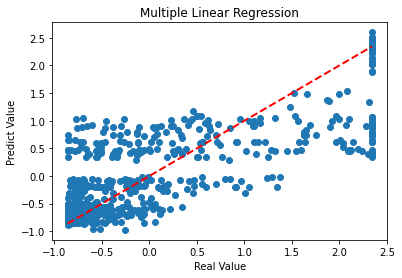

均方誤差: 0.42370623685449826
R-squared: 0.5762937631455016


In [439]:
# 建立線性回歸模型
model = LinearRegression()

# 擬合資料
model.fit(X, y)

y_pred = model.predict(X)

# 視覺化結果
plt.scatter(y, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Real Value')
plt.ylabel('Predict Value')
plt.title('Multiple Linear Regression')
plt.show()

# 計算均方誤差
mse = mean_squared_error(y, y_pred)
print("均方誤差:", mse)

# 計算 R 平方值
r2 = model.score(X, y)
print("R-squared:", r2)

In [440]:
model.coef_

array([ 1.77968848e+13,  1.77968848e+13,  4.42093590e+11,  4.42093590e+11,
        1.76169831e+13,  1.76169831e+13,  1.76169831e+13,  1.76169831e+13,
        1.76169831e+13,  1.76169831e+13,  3.43298962e+13,  3.43298962e+13,
        3.43298962e+13, -2.95308751e+12, -2.95308751e+12, -2.95308751e+12,
       -2.95308751e+12, -2.95308751e+12, -2.27558938e+12, -2.27558938e+12,
       -2.27558938e+12])

In [441]:
# 輸出迴歸係數，找出影響最大的要素
pd.DataFrame({'feature': X.columns, 'coefficient': abs(model.coef_)}).sort_values(by='coefficient', ascending=False)

,feature,coefficient
10,Marital_Status_Divorced,3.432990e+13
12,Marital_Status_Single,3.432990e+13
11,Marital_Status_Married,3.432990e+13
1,Attrition_Flag_Existing Customer,1.779688e+13
0,Attrition_Flag_Attrited Customer,1.779688e+13
9,Education_Level_Uneducated,1.761698e+13
5,Education_Level_Doctorate,1.761698e+13
7,Education_Level_High School,1.761698e+13
8,Education_Level_Post-Graduate,1.761698e+13
6,Education_Level_Graduate,1.761698e+13


In [442]:
from scipy import stats

# 計算 Z 分數
z_scores = stats.zscore(X)

# 利用閾值 2 選擇要保留的觀測值
filtered_indices = (z_scores <= 2.5).all(axis=1)

# 選擇符合閾值的觀測值
X_filtered = X[filtered_indices]
y_filtered = y[filtered_indices]

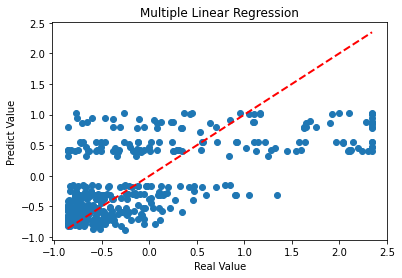

均方誤差: 0.4296318481502929
R-squared: 0.4232356732113053


In [443]:
model = LinearRegression()

# 擬合資料
model.fit(X_filtered, y_filtered)

y_pred = model.predict(X_filtered)

# 視覺化結果
plt.scatter(y_filtered, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Real Value')
plt.ylabel('Predict Value')
plt.title('Multiple Linear Regression')
plt.show()

# 計算均方誤差
mse = mean_squared_error(y_filtered, y_pred)
print("均方誤差:", mse)

# 計算 R 平方值
r2 = model.score(X_filtered, y_filtered)
print("R-squared:", r2)

In [444]:
# 輸出迴歸係數，找出影響最大的要素
pd.DataFrame({'feature': X.columns, 'coefficient': abs(model.coef_)}).sort_values(by='coefficient', ascending=False)

,feature,coefficient
11,Marital_Status_Married,4.962159e+13
12,Marital_Status_Single,4.962159e+13
0,Attrition_Flag_Attrited Customer,4.190926e+13
1,Attrition_Flag_Existing Customer,4.190926e+13
3,Gender_M,2.347316e+13
2,Gender_F,2.347316e+13
9,Education_Level_Uneducated,1.374680e+13
5,Education_Level_Doctorate,1.374680e+13
8,Education_Level_Post-Graduate,1.374680e+13
7,Education_Level_High School,1.374680e+13
